In [44]:
import cv2
import torch
import numpy as np

from yolox.utils import LRScheduler

epoch = 300
iter_per_epoch = 892

scheduler = LRScheduler(
    "yoloxwarmcos",
    0.002 / 64.0 * 32,
    iter_per_epoch,
    epoch,
    warmup_epochs=10,
    warmup_lr_start=0,
    no_aug_epochs=50,
    min_lr_ratio=0.05,
)


In [45]:
lrs = []
for progress_in_iter in range(epoch*iter_per_epoch):
    lr = scheduler.update_lr(progress_in_iter + 1)
    lrs.append(lr)

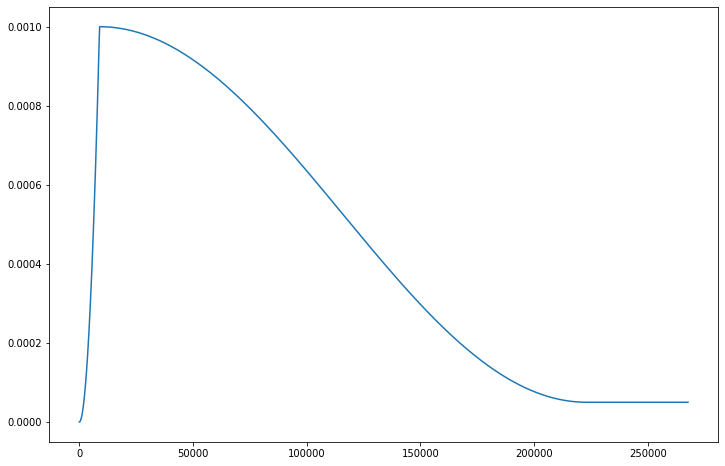

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(epoch*iter_per_epoch), lrs)

In [1]:
from yolox.exp import Exp, get_exp

exp = get_exp("exp.py", "test_dtld")

In [2]:
batch_size=1

train_loader = exp.get_data_loader(
            batch_size=batch_size,
            is_distributed=False,
            no_aug=False,
            cache_img=False,
        )

lr_scheduler = exp.get_lr_scheduler(
            exp.basic_lr_per_img * 1, len(train_loader)
        )

FileNotFoundError: [Errno 2] No such file or directory: '/data/DTLD/v2.0/DTLD_train.json'